In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.cluster import KMeans

In [2]:
file_name = 'R12.txt'

In [3]:
dataset = []
with open(file_name) as f:
    q = f.readline()
    [di, n_d, m, k, o] = [int(i) for i in q.split()]
    D = np.zeros((n_d,di))
    X = [[0.0]*di for i in range(n_d)]
    r_point = [0]*di
    q = f.readline()
    k_c = [int(i) for i in q.split()]
    i = 0
    for line in f:
        r_point = [0]*di
        r_point = line.split()
        D[i] = [float(rr) for rr in r_point]
        X[i] = [float(rr) for rr in r_point]
        i += 1
m = int(m)

Automatically created module for IPython interactive environment


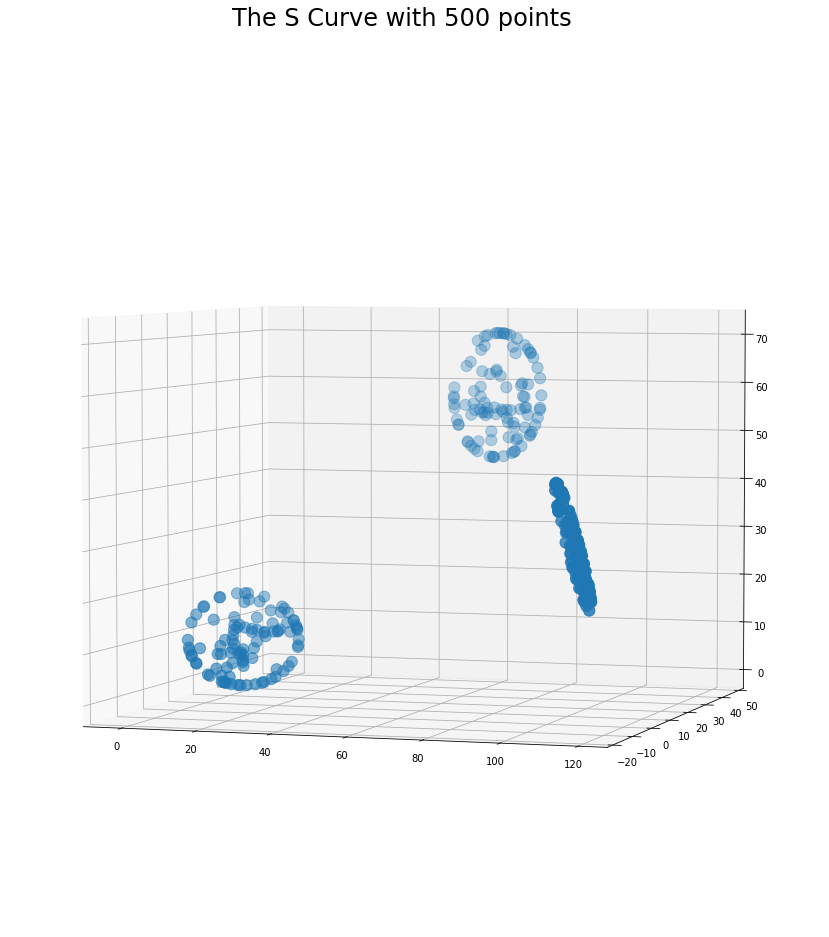

In [4]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 500
# X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

X = D

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The S Curve with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)

In [5]:
kmeans = KMeans(n_clusters=m, random_state=1).fit(D)
manifolds = [[] for i in range(m)]
manifold_centers = kmeans.cluster_centers_

In [6]:
cc = kmeans.fit_predict(D)

In [7]:
sub_names = [[] for i in range(m)]
sub_index = [[] for i in range(m)]
for i in range(n_d):
    sub_names[cc[i]].append(D[i])
    sub_index[cc[i]].append(i)

In [8]:
for k in sub_index:
    print(len(k))

100
100
100


In [9]:
def peda(a,b):
    s = 0
    for i in range(di):
        s += (a[i] - b[i])**2
    return(np.sqrt(s))

In [10]:
def mandr_finder(A, a, m1):
    mn = A[0]
    mm =  peda(mn,m1)
    for node in A:
        if peda(node,m1) < mm:
            mm =  peda(node,m1)
            mn = node
    m1 = mn

    mn = A[0]
    mm =  peda(mn,m1)
    for node in A:
        if peda(node,m1) > mm:
            mm =  peda(node,m1)
            mn = node
    r1 = mm
    return(m1, r1)

In [11]:
manifold_rad = [0] * m
for i in range(m):
    (m1, r1) = mandr_finder(sub_names[i], sub_index[i], manifold_centers[i])
    manifold_centers[i] = m1
    manifold_rad[i] = r1

In [12]:
def pmr(m, r):
    for k in m:
        print(k, end = ' ')
    print(r)

In [13]:
def spiliter(data, data_index, n_cluster, dim):
    global sum_error
    cluster_centers = []*n_cluster
    kmeans = KMeans(n_clusters=n_cluster, random_state=1).fit(data)
    cluster_centers = kmeans.cluster_centers_
    cc = kmeans.fit_predict(data)
    
    spilit_data = [[] for _ in range(n_cluster)]
    for i in range(len(data)):
        spilit_data[cc[i]].append(data_index[i])
    sum_error += kmeans.inertia_
    return(spilit_data)

In [14]:
def print_cluster(clusters):
    for cl in clusters:
        print(len(cl), end = ' ')
        for p in cl:
            print(p, end= ' ')
        print()

In [15]:
print(n_d, m)
sum_error = 0
for i in range(m):
    clusters_A = spiliter(sub_names[i], sub_index[i], k_c[i], di)
    print(di, k_c[i], "Sphere")
    print()
    pmr(manifold_centers[i], manifold_rad[i])
    print_cluster(clusters_A)

300 3
3 1 Sphere

11.381312977066692 9.100228561068505 7.362145392772733 16.026347363986016
100 50 51 52 53 56 58 61 64 65 67 69 71 72 75 77 79 81 84 86 89 91 93 99 101 103 106 107 111 112 113 115 117 119 120 122 128 132 136 137 138 139 140 144 145 148 149 150 151 152 156 157 158 161 162 164 170 172 173 175 176 180 181 184 186 187 189 195 197 199 201 209 211 214 218 219 225 226 228 233 234 239 242 243 244 256 257 258 261 264 265 269 270 272 273 275 276 283 291 297 299 
3 1 Sphere

112.10973839622089 -9.352870374071308 31.59153912154923 15.863688079740205
100 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 55 59 66 68 74 80 83 87 88 94 96 97 108 109 114 123 126 127 130 133 134 135 141 146 160 167 169 183 188 191 192 196 200 206 207 208 222 223 232 241 245 246 249 252 255 277 278 282 286 290 
3 1 Sphere

61.61733142368716 46.73260545277786 54.00626191468671 16.29123246677849
100 54 57 60 62 63 70 